In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-price-determinants-in-europe/paris_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/rome_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/berlin_weekdays.csv
/kaggle/input/airbnb-price-determinants-in-europe/amsterdam_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/lisbon_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/amsterdam_weekdays.csv
/kaggle/input/airbnb-price-determinants-in-europe/rome_weekdays.csv
/kaggle/input/airbnb-price-determinants-in-europe/athens_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/budapest_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/barcelona_weekdays.csv
/kaggle/input/airbnb-price-determinants-in-europe/barcelona_weekends.csv
/kaggle/input/airbnb-price-determinants-in-europe/budapest_weekdays.csv
/kaggle/input/airbnb-price-determinants-in-europe/vienna_weekdays.csv
/kaggle/input/airbnb-price-determinants-in-europe/london_weekends.csv
/kaggle/i

In [2]:
#reading all the csv files in one single dataframe
df_n=[] # assinging the blank dataframe in which the consolidated data will be stored
path=r'/kaggle/input/airbnb-price-determinants-in-europe/' #path of the data
l=os.listdir(path) #creating a list of all the files
for file in l:
    df=pd.read_csv(path+file) # reading the individual files
    t=file.split(".")  # splitting the name of each files
    del(t[1]) #deleting the 'csv' entries
    t=t[0].split("_") #splitting the string to get the location and day type
    df['location']=t[0] #adding the location column to fill in the city name
    df['day_type']=t[1] #adding the day type column to know if it's weekend or the weekday data
    df_n.append(df) # appending the dataframe in a list
df_n=pd.concat(df_n) # concating all the files in a vertical fashion column wise
df_n

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,location,day_type
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,...,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800,paris,weekends
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,...,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,paris,weekends
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,...,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,paris,weekends
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,...,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,paris,weekends
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,...,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,paris,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,4609,310.449446,Private room,False,True,2.0,False,0,0,10.0,...,6.347654,0.445862,194.410695,13.513703,446.486289,7.994710,-0.21207,51.48667,london,weekdays
4610,4610,265.057974,Entire home/apt,False,False,4.0,False,1,0,8.0,...,5.231706,0.463949,254.476513,17.688945,537.720506,9.628334,-0.05459,51.52018,london,weekdays
4611,4611,142.289329,Private room,False,True,2.0,False,0,0,10.0,...,8.867238,2.675007,125.891017,8.750824,266.789887,4.777096,-0.12056,51.42875,london,weekdays
4612,4612,372.304146,Private room,False,True,2.0,False,0,0,8.0,...,7.576798,1.682697,146.161215,10.159828,325.152018,5.822118,-0.12810,51.44023,london,weekdays


In [3]:
r=df_n.groupby(by=['Unnamed: 0']) # checking if the column has unique values
print(r.groups)
#since the ids don't have unique values we can drop this column
df_n=df_n.drop(columns=['Unnamed: 0'],axis=1)
df_n

{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 2: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 3: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 4: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 5: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 6: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 7: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], 8: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 9: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], 10: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], 11: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], 12: [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 13: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 14: [

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,location,day_type
0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,...,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800,paris,weekends
1,290.101594,Private room,False,True,2.0,True,0,0,10.0,97.0,...,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,paris,weekends
2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,...,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,paris,weekends
3,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,...,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,paris,weekends
4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,...,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,paris,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,310.449446,Private room,False,True,2.0,False,0,0,10.0,100.0,...,6.347654,0.445862,194.410695,13.513703,446.486289,7.994710,-0.21207,51.48667,london,weekdays
4610,265.057974,Entire home/apt,False,False,4.0,False,1,0,8.0,84.0,...,5.231706,0.463949,254.476513,17.688945,537.720506,9.628334,-0.05459,51.52018,london,weekdays
4611,142.289329,Private room,False,True,2.0,False,0,0,10.0,97.0,...,8.867238,2.675007,125.891017,8.750824,266.789887,4.777096,-0.12056,51.42875,london,weekdays
4612,372.304146,Private room,False,True,2.0,False,0,0,8.0,80.0,...,7.576798,1.682697,146.161215,10.159828,325.152018,5.822118,-0.12810,51.44023,london,weekdays


Checking for any null values

In [4]:
r=df_n.groupby(by=['room_type']).sum()
print(r)

                      realSum  room_shared  room_private  person_capacity  \
room_type                                                                   
Entire home/apt  1.058824e+07            0             0         119153.0   
Private room     3.830948e+06            0         18693          42972.0   
Shared room      5.254522e+04          366             0           1355.0   

                 host_is_superhost  multi    biz  cleanliness_rating  \
room_type                                                              
Entire home/apt               8944   7997  11818            307486.0   
Private room                  4247   6993   6070            174804.0   
Shared room                     41     75    220              3271.0   

                 guest_satisfaction_overall  bedrooms          dist  \
room_type                                                             
Entire home/apt                   3032630.0     40319  91355.060012   
Private room                      172407

Since all the columns are showing sums hence we can assume that there are no null values

In [5]:
#making a new dataframe having the locations and the avg of the total booking prices
df1=df_n.pivot_table(index=['location'], columns=['day_type'], values=['realSum'], aggfunc='mean')
df1['location']=df1.index
df1

realSum               location
day_type     weekdays    weekends           
location                                    
amsterdam  545.020526  604.828018  amsterdam
athens     155.866982  147.580456     athens
barcelona  288.391667  300.277940  barcelona
berlin     240.220422  249.252516     berlin
budapest   168.429367  185.120628   budapest
lisbon     236.345459  240.044051     lisbon
london     360.230348  364.389747     london
paris      398.786678  387.028589      paris
rome       201.618053  209.130063       rome
vienna     240.384834  242.739524     vienna

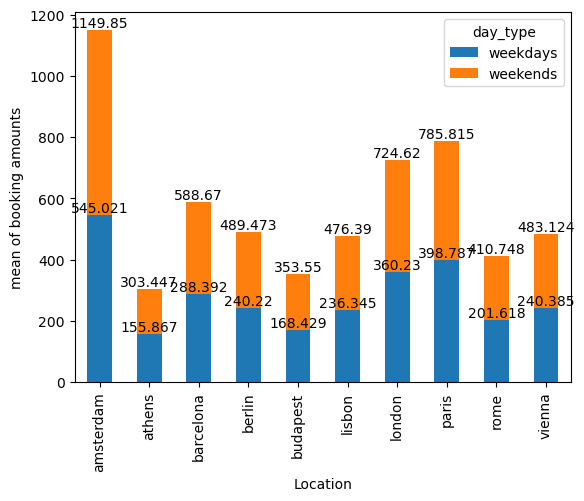

In [6]:
ax=df1.plot.bar(x='location',y='realSum', stacked=True,xlabel='Location',ylabel='mean of booking amounts')
for container in ax.containers:
    ax.bar_label(container)

In [7]:
df2=df_n.pivot_table(index=['location'], columns=['room_type'], values=['room_private'], aggfunc='count')
df2['location']=df2.index #adding the location column in the dataframe for plotting
df2

room_private                            location
room_type Entire home/apt Private room Shared room           
location                                                     
amsterdam            1126          944          10  amsterdam
athens               4872          397          11     athens
barcelona             542         2279          12  barcelona
berlin                882         1529          73     berlin
budapest             3589          419          14   budapest
lisbon               3878         1811          74     lisbon
london               4384         5559          50     london
paris                5067         1527          94      paris
rome                 5561         3454          12       rome
vienna               2747          774          16     vienna

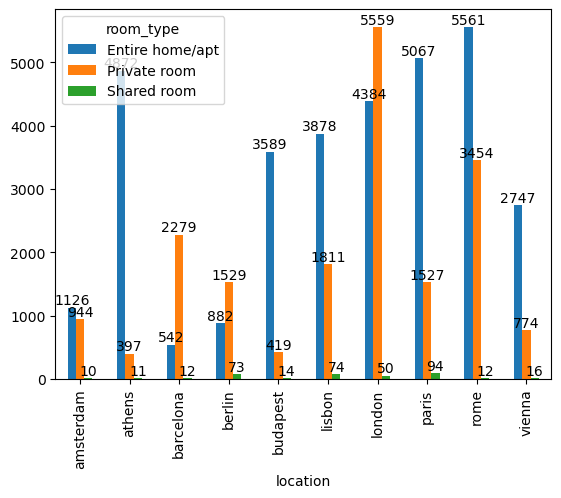

In [8]:
ax=df2.plot.bar(x='location',y='room_private')
for container in ax.containers:
    ax.bar_label(container)

In [9]:
df3=df_n.pivot_table(index=['location'], values=['dist','realSum'], aggfunc={'dist':'mean', 'realSum':'count'})
df3

,dist,realSum
location,,
amsterdam,2.825052,2080
athens,1.803080,5280
barcelona,2.116982,2833
berlin,5.257093,2484
budapest,1.872763,4022
lisbon,1.966893,5763
london,5.326421,9993
paris,2.995823,6688
rome,3.026982,9027


In [10]:
df3['location']=df3.index #adding the location column in the pivoted dataframe to aid
df3                              #in the making of column chart

,dist,realSum,location
location,,,
amsterdam,2.825052,2080,amsterdam
athens,1.803080,5280,athens
barcelona,2.116982,2833,barcelona
berlin,5.257093,2484,berlin
budapest,1.872763,4022,budapest
lisbon,1.966893,5763,lisbon
london,5.326421,9993,london
paris,2.995823,6688,paris
rome,3.026982,9027,rome


<AxesSubplot:title={'center':'Booking pattern as per the distance from city centre'}, xlabel='Cities', ylabel='Number of Bookings'>

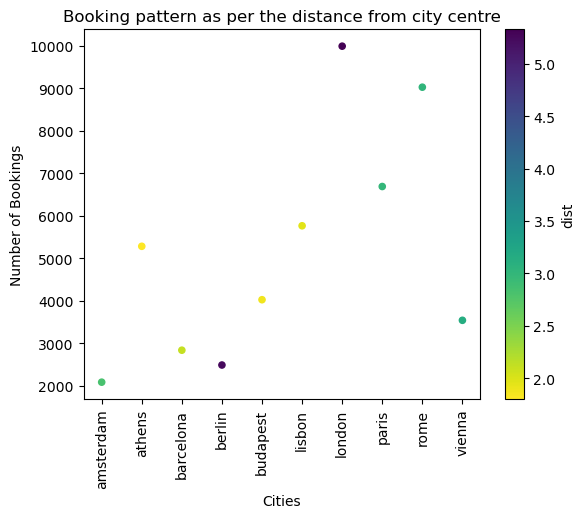

In [11]:
df3.plot.scatter(x='location', y='realSum', c='dist', colormap='viridis_r',rot='vertical', xlabel='Cities', ylabel='Number of Bookings', title='Booking pattern as per the distance from city centre')

We can infer that the more number of bookings tend to happen near the city centres but it also depends on the popularity of the city. cities like london see higher number of hotel bookings which are present further away from the city centre 

In [12]:
df4=df_n.pivot_table(index=['location'], columns=['host_is_superhost'],values=['realSum'], aggfunc='count')
df4['location']=df4.index
df4

realSum         location
host_is_superhost   False  True           
location                                  
amsterdam            1489   591  amsterdam
athens               3017  2263     athens
barcelona            2319   514  barcelona
berlin               1845   639     berlin
budapest             2498  1524   budapest
lisbon               4530  1233     lisbon
london               8420  1573     london
paris                5747   941      paris
rome                 6078  2949       rome
vienna               2532  1005     vienna

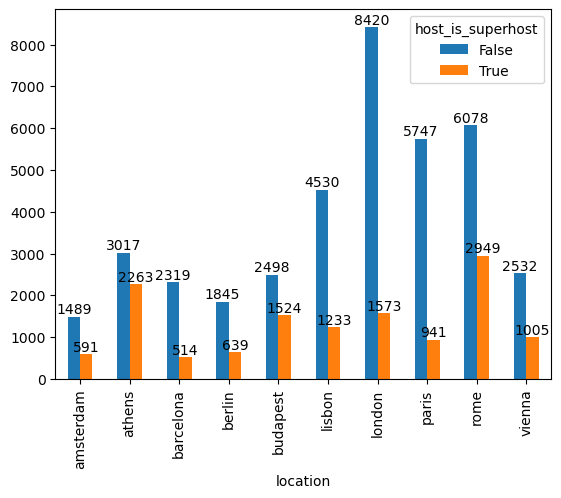

In [13]:
ax=df4.plot.bar(x='location',y='realSum')
for container in ax.containers:
    ax.bar_label(container)

From the above analysis we can infer that customers do not tend to look if the host is sperhost or not

In [14]:
df6=df_n.pivot_table(index='cleanliness_rating',values='guest_satisfaction_overall',aggfunc='mean')
df6=df6.reset_index()
df6

,cleanliness_rating,guest_satisfaction_overall
0,2.0,30.069930
1,3.0,45.900000
2,4.0,51.748252
3,5.0,61.395349
4,6.0,69.852295
5,7.0,77.427666
6,8.0,84.016085
7,9.0,90.801591
8,10.0,96.268999


<AxesSubplot:title={'center':'guest rating and cleanliness rating trend'}, xlabel='Cleanliness Rating', ylabel='Average Guest Satisfaction Rating'>

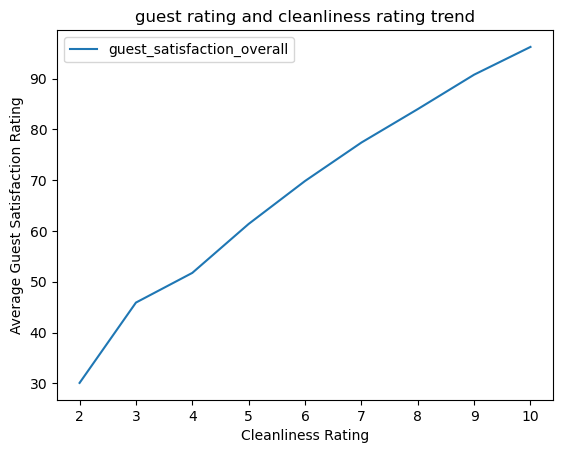

In [15]:
df6.plot.line(x='cleanliness_rating',y='guest_satisfaction_overall', xlabel='Cleanliness Rating',ylabel='Average Guest Satisfaction Rating',title='guest rating and cleanliness rating trend')

The guest satisfaction is more for hotels with higher cleanliness